In [39]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

# cheese-maze-1 and cheese-maze 2 run with exploration=0.1, cheese value = default, ct-depth=256, horizon=16.

data = pd.read_csv('../logs/cheesemaze-2.csv',sep=', ',engine='python')
print data.tail()

       cycle  observation  reward  action  explored  explore_rate  \
11578      1           10      10       1         0       0.10000   
11579      2            8       9       2         0       0.09900   
11580      3            5       9       2         0       0.09801   
11581      1           10      10       1         0       0.10000   
11582      2            8       9       3         0       0.09900   

       total reward  average reward  
11578            10         5.00000  
11579            19         6.33333  
11580            28         7.00000  
11581            10         5.00000  
11582            19         6.33333  


In [40]:
# get cycles per episode, average reward per episode

reward_offset = dict()
reward_offset["cheese-maze"] = 10

cycles = np.array(data[['cycle']])
rewards = np.array(data[['total reward']])
for i in xrange(len(rewards)):
    rewards[i] -= cycles[i]*reward_offset["cheese-maze"]
episode_lengths = list()
average_rewards = list()
for i in xrange(len(cycles)):
    if i==1:
        continue
    if cycles[i,0]==1:
        episode_lengths.append(cycles[i-1])
        average_rewards.append(float(rewards[i-1])/cycles[i-1])

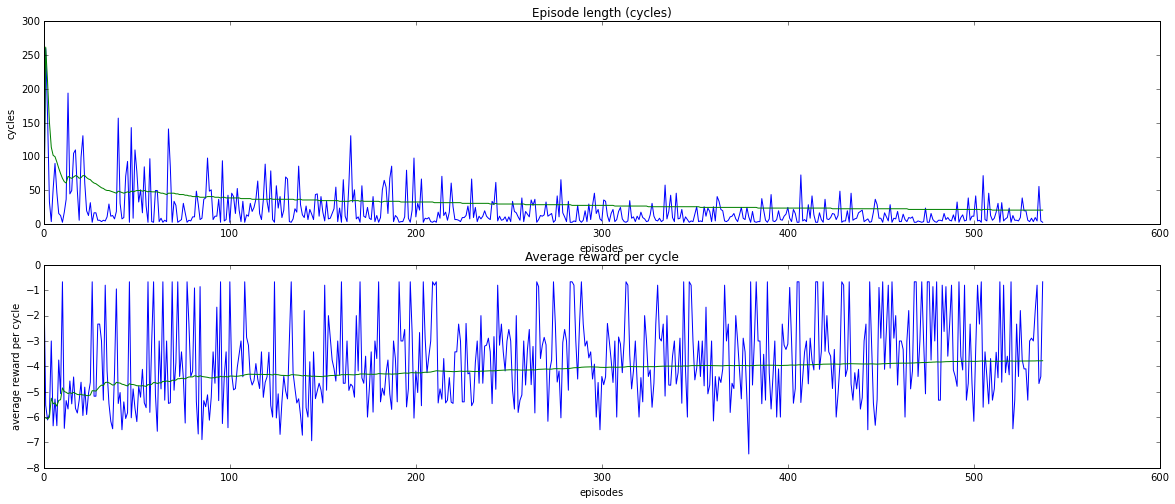

In [41]:
cs = np.cumsum(np.array(average_rewards))

for i in xrange(len(cs)):
    cs[i]/=i
fig = plt.figure(figsize=(20,8))

cs2 = np.cumsum(np.array(episode_lengths))
for i in xrange(len(cs2)):
    cs2[i]/=i

ax = fig.add_subplot(211)
ax.set_title('Episode length (cycles)')
ax.set_xlabel('episodes')
ax.set_ylabel('cycles')
ax.plot(episode_lengths,label="Test")
ax.plot(cs2,label="Test")

ax = fig.add_subplot(212)
ax.set_title('Average reward per cycle')
ax.set_ylabel('average reward per cycle')
ax.set_xlabel('episodes')
ax.plot(average_rewards,label="Test")
ax.plot(cs,label="Test")
#plt.legend(loc='upper left')
plt.show()